In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('data/creditcard_sampledata_3.csv', index_col=0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5050 entries, 258647 to 63421
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      5050 non-null   float64
 1   V2      5050 non-null   float64
 2   V3      5050 non-null   float64
 3   V4      5050 non-null   float64
 4   V5      5050 non-null   float64
 5   V6      5050 non-null   float64
 6   V7      5050 non-null   float64
 7   V8      5050 non-null   float64
 8   V9      5050 non-null   float64
 9   V10     5050 non-null   float64
 10  V11     5050 non-null   float64
 11  V12     5050 non-null   float64
 12  V13     5050 non-null   float64
 13  V14     5050 non-null   float64
 14  V15     5050 non-null   float64
 15  V16     5050 non-null   float64
 16  V17     5050 non-null   float64
 17  V18     5050 non-null   float64
 18  V19     5050 non-null   float64
 19  V20     5050 non-null   float64
 20  V21     5050 non-null   float64
 21  V22     5050 non-null   float64

In [8]:
df['Class'].value_counts()

0    5000
1      50
Name: Class, dtype: int64

In [9]:
df['Class'].value_counts()/df.shape[0]

0    0.990099
1    0.009901
Name: Class, dtype: float64

## Sử dụng LogisticRegression trên dữ liệu gốc

In [10]:
X = df.drop(columns=['Class'])
y = df['Class']

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
model_o = LogisticRegression()
model_o.fit(X_train, y_train)

c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [20]:
# đo accuracy
print('Train accuracy score', model_o.score(X_train, y_train))
print('Test accuracy score', model_o.score(X_test, y_test))
      

Train accuracy score 0.9995049504950495
Test accuracy score 0.997029702970297


In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
yhat_test = model_o.predict(X_test)

In [23]:
print('Confusion matrix:')
print(confusion_matrix(y_test, yhat_test))

Confusion matrix:
[[1003    1]
 [   2    4]]


In [25]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1004
           1       0.80      0.67      0.73         6

    accuracy                           1.00      1010
   macro avg       0.90      0.83      0.86      1010
weighted avg       1.00      1.00      1.00      1010



In [26]:
# ở trên dữ liệu gốc, độ chính xác khi phát hiện gian lận là 80%, khả năng phát hiện 67%
# để cải thiện --> làm việc với dữ liệu cân bằng

## Cân bằng dữ liệu

### UnderSampling

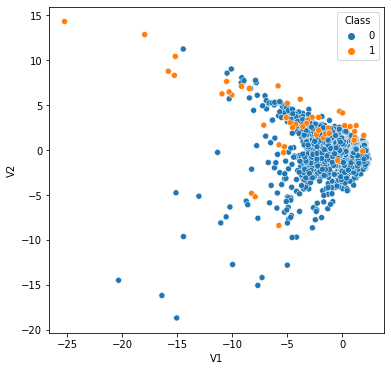

In [28]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='V1', y='V2', hue='Class')
plt.show()

In [29]:
from imblearn.under_sampling import RandomUnderSampler

In [30]:
rs = RandomUnderSampler()

In [32]:
X_rs, y_rs = rs.fit_resample(X, y)

In [33]:
df_rs = pd.DataFrame(X_rs)
df_rs['Class'] = y_rs

In [34]:
df_rs['Class'].value_counts()

1    50
0    50
Name: Class, dtype: int64

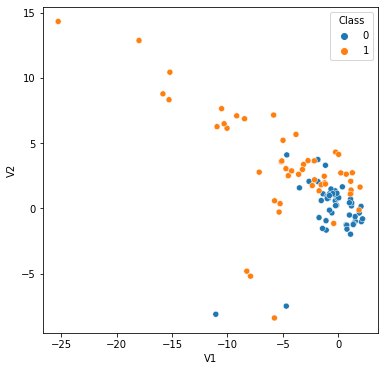

In [35]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_rs, x='V1', y='V2', hue='Class')
plt.show()

In [36]:
from sklearn.utils import resample

In [37]:
df_0 = df[df['Class'] == 0]
df_1 = df[df['Class'] == 1]

In [38]:
df_0.shape, df_1.shape

((5000, 30), (50, 30))

In [40]:
df_0_rs = resample(df_0, replace=False, n_samples = df_1.shape[0], random_state=27)

In [41]:
df_0_rs.shape

(50, 30)

In [42]:
df_rs_2 = pd.concat([df_0_rs, df_1])

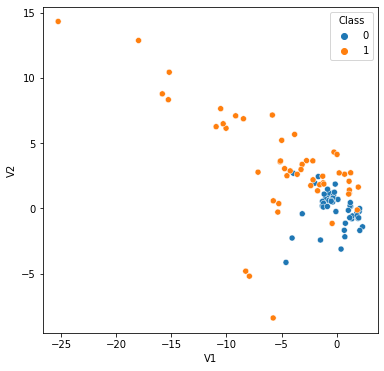

In [43]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_rs_2, x='V1', y='V2', hue='Class')
plt.show()

### OverSampling

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
sm = SMOTE()

In [46]:
X_sm, y_sm = sm.fit_resample(X, y)

In [47]:
df_sm = pd.DataFrame(X_sm)
df_sm['Class'] = y_sm

In [48]:
df_sm['Class'].value_counts()

1    5000
0    5000
Name: Class, dtype: int64

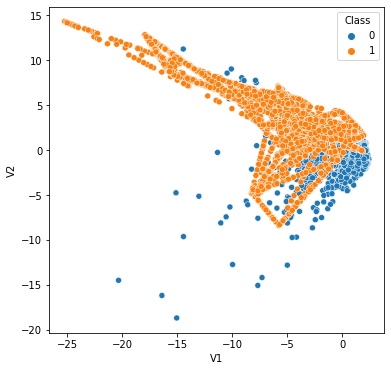

In [49]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_sm, x='V1', y='V2', hue='Class')
plt.show()

In [50]:
#sử dụng resample
df_0 = df[df['Class'] == 0]
df_1 = df[df['Class'] == 1]

In [51]:
df_0.shape, df_1.shape

((5000, 30), (50, 30))

In [52]:
df_1_rs = resample(df_1, replace=True, n_samples = df_0.shape[0], random_state=27)

In [53]:
df_rs_2 = pd.concat([df_0, df_1_rs])

In [54]:
df_rs_2['Class'].value_counts()

1    5000
0    5000
Name: Class, dtype: int64

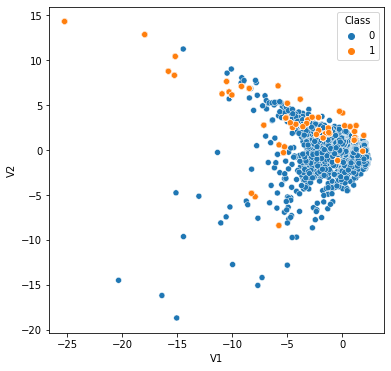

In [55]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_rs_2, x='V1', y='V2', hue='Class')
plt.show()

## Sử dụng LogisticRegression trên dữ liệu đã cân bằng

In [56]:
X = df.drop(columns=['Class'])
y = df['Class']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
# cân bằng dữ liệu với SMOTE
sm = SMOTE()

In [59]:
X_train_rs, y_train_rs = sm.fit_resample(X_train, y_train)

In [60]:
model_rs = LogisticRegression()

In [61]:
model_rs.fit(X_train_rs, y_train_rs)

c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [62]:
# đo accuracy
print('Train accuracy score', model_rs.score(X_train_rs, y_train_rs))
print('Test accuracy score', model_rs.score(X_test, y_test))

Train accuracy score 0.997997997997998
Test accuracy score 0.997029702970297


In [63]:
yhat_test = model_rs.predict(X_test)

In [64]:
print('Confusion matrix:')
print(confusion_matrix(y_test, yhat_test))

Confusion matrix:
[[1002    2]
 [   1    5]]


In [65]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1004
           1       0.71      0.83      0.77         6

    accuracy                           1.00      1010
   macro avg       0.86      0.92      0.88      1010
weighted avg       1.00      1.00      1.00      1010



In [ ]:
# ở trên dữ liệu cân bằng, độ chính xác khi phát hiện gian lận là 71%, khả năng phát hiện 83%
